In [16]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


In [17]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('new-pci-thesis.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(axis=0, inplace=True)

df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('new-pci-thesis-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('new-pci-thesis-cleaned.csv')

any nan = False
all finite = True


In [18]:
# Take a quick look at the dataset
df.head()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
0,0.000,3.800,0.000,0.320,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.010,0.000,0.000,0.000,0.000,0.000,1.550,36.000
1,0.000,1.590,0.000,1.700,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.090,0.000,0.000,0.000,2.220,0.000,1.250,56.000
2,0.000,0.930,0.000,0.750,3.640,0.000,0.740,0.000,0.000,0.000,0.000,0.600,0.000,0.000,0.260,0.000,0.000,0.330,46.000
3,0.000,11.970,2.990,0.000,1.220,0.000,0.000,0.430,0.000,0.000,0.250,0.000,0.000,0.000,0.000,0.000,2.970,0.000,45.000
4,0.000,1.330,0.000,0.000,0.000,0.010,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.320,0.000,87.000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC1     317 non-null    float64
 1   AC2     317 non-null    float64
 2   AC3     317 non-null    float64
 3   BE1     317 non-null    float64
 4   BE2     317 non-null    float64
 5   BE3     317 non-null    float64
 6   D1      317 non-null    float64
 7   D2      317 non-null    float64
 8   D3      317 non-null    float64
 9   F1      317 non-null    float64
 10  F2      317 non-null    float64
 11  F3      317 non-null    float64
 12  G1      317 non-null    float64
 13  G2      317 non-null    float64
 14  G3      317 non-null    float64
 15  H1      317 non-null    float64
 16  H2      317 non-null    float64
 17  H3      317 non-null    float64
 18  PCI     317 non-null    float64
dtypes: float64(19)
memory usage: 47.2 KB


In [20]:
df.describe()

,AC1,AC2,AC3,BE1,BE2,BE3,D1,D2,D3,F1,F2,F3,G1,G2,G3,H1,H2,H3,PCI
count,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000,317.000
mean,0.408,0.736,0.678,0.160,0.473,0.429,0.174,0.264,0.223,0.051,0.028,0.040,0.035,0.064,0.090,0.071,0.205,0.120,57.517
std,0.561,1.074,1.063,0.405,0.742,0.699,0.309,0.417,0.395,0.192,0.090,0.137,0.134,0.192,0.234,0.258,0.551,0.347,21.650
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,44.000
50%,0.150,0.459,0.330,0.000,0.150,0.090,0.000,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,58.000
75%,0.620,1.120,0.950,0.100,0.660,0.600,0.230,0.380,0.300,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,74.000
max,3.050,11.970,12.500,2.770,5.600,4.560,1.910,2.600,3.200,2.100,0.900,1.200,1.200,1.620,2.000,2.400,3.200,3.080,100.000


#### Creation of Linear Regression Objects

In [21]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['PCI'],axis=1)

# Choose the response variable 'y' 
y = df.PCI



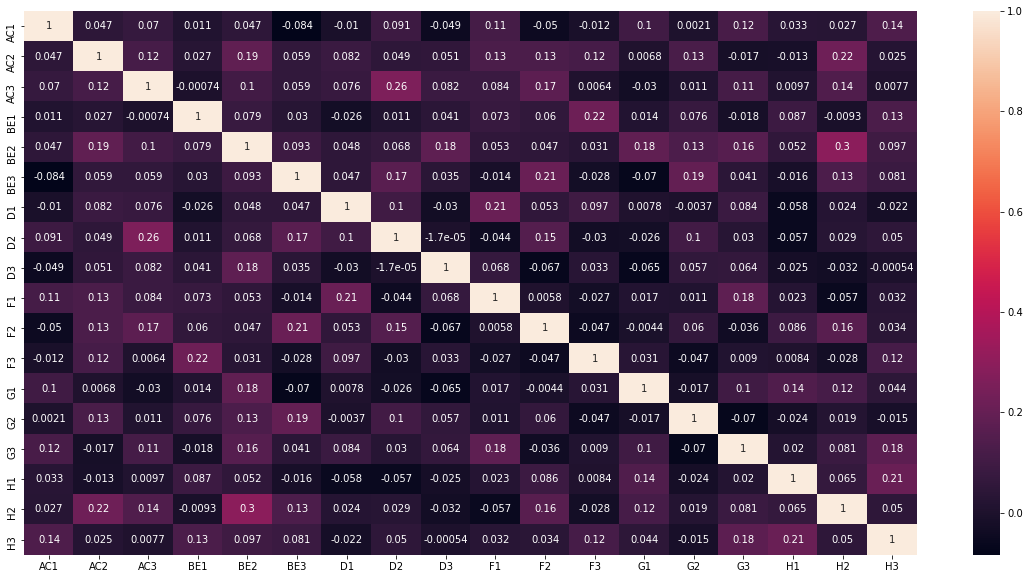

In [22]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

In [23]:

# sns.pairplot(X)

In [24]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [25]:
# start = 0
# r2_list = []
# for rs in range(50):
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=33)


# Perform multi-linear regression with all predictors
multi_linear = LinearRegression()

# Fit the multi-linear regression on all features of the entire data
multi_linear.fit(X_train,y_train)

# Get the coefficients (plural) of the model
multi_coef = multi_linear.coef_
# print(multi_coef)
print(f"test_r2 = {multi_linear.score(X_test,y_test)}")
print(f"train_r2 = {multi_linear.score(X_train,y_train)}")
# r2_list.append(multi_linear.score(X_test,y_test))

# for i,r2 in enumerate(r2_list):
#     if r2>0.55 and r2< 1.62:
#         print(f"{i+start}: {r2}")

test_r2 = 0.5884408236956802
train_r2 = 0.5873320767346488


#### Printing the individual $\beta$ values

In [26]:
print(f"Coefficients: {multi_coef}")
print(f"Intercept: {multi_linear.intercept_}")



Coefficients: [ -4.3610102   -0.79859086  -4.68833477   4.47208848  -1.61648292
  -3.36926703  -6.7482243   -0.42032782 -13.34933054 -20.68149475
 -58.35123241 -66.35812848  -6.64927523  -2.76938401  -7.38737941
  -0.37920044  -2.54452386  -6.54078471]
Intercept: 76.61619145680356


line: y = 0.5083158516923765 * x + 29.396639349120985


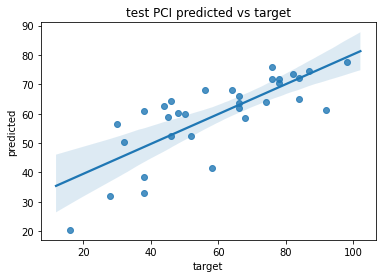

In [27]:

x_test_prediction = multi_linear.predict(X_test)
ax = sns.regplot(x=y_test, y=x_test_prediction)
ax.set(title = 'test PCI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

line: y = 0.5873320767346484 * x + 23.64370006666641


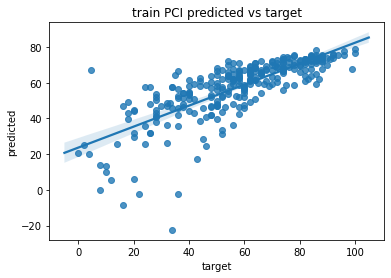

In [28]:
x_train_prediction = multi_linear.predict(X_train)

# less_than_zero_indices = np.where(x_train_prediction<0)[0]
# x_train_prediction = np.delete(x_train_prediction, less_than_zero_indices)
# y_train_new = y_train.drop(less_than_zero_indices, axis=0)


ax = sns.regplot(x=y_train, y= x_train_prediction)
ax.set(title = 'train PCI predicted vs target', xlabel='target', ylabel='predicted')

import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=ax.get_lines()[0].get_xdata(),
                                                       y=ax.get_lines()[0].get_ydata())

print(f"line: y = {slope} * x + {intercept}")

In [29]:
# Now using the stat

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.9, random_state=33)

# Assuming you have your data stored in X and y
# X should be a 2-dimensional array (or DataFrame) containing your features
# y should be a 1-dimensional array (or Series) containing your target

# Fit the linear regression model using sklearn
# sklearn_model = LinearRegression()
# sklearn_model.fit(X, y)

# Add a constant term to the features (intercept) for statsmodels
X_train_with_constant = sm.add_constant(X_train)

# Fit the linear regression model using statsmodels
statsmodel = sm.OLS(y_train, X_train_with_constant)
results = statsmodel.fit()

# Access the p-values for each coefficient
p_values = results.pvalues
pd.options.display.float_format = '{:.3f}'.format
greater_than_01 = p_values[p_values.index[p_values > 0.1]]
print(p_values)
print("\n\n p_values greater than 0.01")
print(greater_than_01)
count = greater_than_01.count()

# filtered = filter(lambda x: x > 0.1 , p_values)
# print((pd.Series(filtered)))
# print(p_values)

results.summary()



const   0.000
AC1     0.007
AC2     0.342
AC3     0.000
BE1     0.040
BE2     0.210
BE3     0.010
D1      0.019
D2      0.846
D3      0.000
F1      0.000
F2      0.000
F3      0.000
G1      0.301
G2      0.539
G3      0.055
H1      0.920
H2      0.140
H3      0.011
dtype: float64


 p_values greater than 0.01
AC2   0.342
BE2   0.210
D2    0.846
G1    0.301
G2    0.539
H1    0.920
H2    0.140
dtype: float64


0   74.637
dtype: float64

In [30]:

# # Initialize a list to store the beta values for each linear regression model
# linear_coef = []
# linear_score = []

# # Loop over all the predictors
# # In each loop "i" holds the name of the predictor 
# for i in X_train:
    
#     # Set the current predictor as the variable x_train
#     x_train = X_train[[i]]

#     # Create a linear regression object
#     linreg = LinearRegression()

#     # Fit the model with training data 
#     # Remember to choose only one column at a time i.e. given by x_train (not X_train)
#     linreg.fit(x_train,y_train)
    
#     # Add the coefficient value of the model to the list
#     linear_coef.append(linreg.coef_)
#     linear_score.append(linreg.score(X_test[[i]], y_test))
    
# linear_coef
# linear_score
